In [10]:
import numpy as np
import torch
import os
import h5py
os.chdir('../networks')
from afnonet import AFNONet
os.chdir('../utils')
from collections import OrderedDict
from YParams import YParams
from darcy_loss import LpLoss
# from data_loader_multifiles import get_data_loader
import matplotlib.pyplot as plt
import seaborn as sns

from einops import rearrange

In [11]:
ic=5

lat = np.flip(np.load('/pscratch/sd/s/shas1693/data/era5/latitude.npy'))
lon  = np.load('/pscratch/sd/s/shas1693/data/era5/longitude.npy')
midlat1 = np.arange(start=0,stop=360)
# print(midlat1)
midlat2= np.arange(start=360, stop=720)
# print(midlat2)
midlat = np.concatenate([midlat1,midlat2])
print(np.size(midlat,0))
# path1 = '/pscratch/sd/m/mmccabe/results/era5_wind/afno_backbone/dfs_fullspec_lowlr/'
path1 = '/pscratch/sd/m/mmccabe/results/era5_wind/afno_backbone/Exp35_FourierEverything/'

# path1 = '/pscratch/sd/m/mmccabe/results/era5_wind/afno_backbone/dfs_fullspec_lowlr/'
# path2 = "/pscratch/sd/s/shas1693/results/era5_wind/pretrained_two_step_afno_20ch_bs_64_lr1em4_blk_8_patch_8_cosine_sched/6/"
# path1 = "/pscratch/sd/s/shas1693/results/era5_wind/afno2_20ch_bs_512_pretrainnoise0.1_finetunenoise0.1_lr5em5/3/"
filename1 = path1+"autoregressive_predictions_z500.h5"
with h5py.File(filename1, "r") as f:
    print(f['rmse'].shape)
    accs_dfs = np.mean(f['rmse'], 0)[:].T
    print(f.keys())
    data_truth1 = f['ground_truth'][ic:ic+1][:]
    data_pred1 = f['predicted'][ic:ic+1][:]
    acc = f['acc'][:]
print(data_pred1.shape)




720
(9, 90, 20)
<KeysViewHDF5 ['acc', 'acc_coarse', 'acc_coarse_unweighted', 'acc_unweighted', 'ground_truth', 'predicted', 'rmse', 'rmse_coarse']>
(1, 90, 20, 720, 1440)


In [12]:
# params = YParams(os.path.abspath('../config/AFNO_base.yaml'), 'afno_backbone')
# params = YParams(os.path.abspath('../config/AFNO_1999.yaml'), 'afno_backbone')

params = YParams(os.path.abspath('../config/AFNO_x4.yaml'), 'afno_backbone')
# params = YParams(os.path.abspath('../config/AFNO_interactive.yaml'), 'afno_backbone')



params['in_channels'] = np.array(params['in_channels'])
params['out_channels'] = np.array(params['out_channels'])
if params.orography:
    params['N_in_channels'] = len(params['in_channels'])+1
else:
    params['N_in_channels'] = len(params['in_channels'])

params['N_out_channels'] = len(params['out_channels'])
model = AFNONet(params)
model2 = AFNONet(params)

# train_data_loader, train_dataset, train_sampler = get_data_loader(params, params.train_data_path, False, train=True)

# start_1999 = train_dataset.n_samples_per_year*21

In [4]:
# Pre FT
# checkpoint_path = "/pscratch/sd/m/mmccabe/results/era5_wind/afno_backbone/1/training_checkpoints/best_ckpt.tar"

# checkpoint_path = '/pscratch/sd/m/mmccabe/results/era5_wind/afno_backbone/dfs_learnfilt_diffop1e2/training_checkpoints/ckpt.tar'
# checkpoint_path = '/pscratch/sd/m/mmccabe/results/era5_wind/afno_backbone/dfs_learnfilt_DFSLearnedVertTrunc2/training_checkpoints/best_ckpt.tar'
# checkpoint_path = '/pscratch/sd/m/mmccabe/results/era5_wind/afno_backbone/check_log/training_checkpoints/best_ckpt.tar'
# checkpoint_path = '/pscratch/sd/m/mmccabe/results/era5_wind/afno_backbone/dfs_learnfilt_initcheck_2/training_checkpoints/best_ckpt.tar'
# checkpoint_path = '/pscratch/sd/m/mmccabe/results/era5_wind/afno_backbone/dfs_learnfilt_diffop5e3/training_checkpoints/best_ckpt.tar'
# checkpoint_path = '/pscratch/sd/m/mmccabe/results/era5_wind/afno_backbone/dfs_polarfilt_baselinelowlr/training_checkpoints/best_ckpt.tar'
# checkpoint_path = '/pscratch/sd/m/mmccabe/results/era5_wind/afno_backbone/dfs_2learn/training_checkpoints/best_ckpt.tar'
# checkpoint_path2 = "/pscratch/sd/m/mmccabe/results/era5_wind/afno_backbone/dfs_2learfact/training_checkpoints/best_ckpt.tar"
# checkpoint_path = "/pscratch/sd/m/mmccabe/results/era5_wind/afno_backbone/dfs_learnfilt_initcheck_2/training_checkpoints/best_ckpt.tar"
# checkpoint_path = '/pscratch/sd/s/shas1693/results/era5_wind/paper/1/training_checkpoints/best_ckpt.tar'
# checkpoint_path = '/pscratch/sd/m/mmccabe/results/era5_wind/afno_backbone/Exp24_ContEmb_1/training_checkpoints/best_ckpt.tar'
# checkpoint_path = "/pscratch/sd/m/mmccabe/results/era5_wind/afno_backbone/Exp28_FourierUpsample/training_checkpoints/best_ckpt.tar"
# checkpoint_path = '/pscratch/sd/m/mmccabe/results/era5_wind/afno_backbone/check_fourupdown/training_checkpoints/best_ckpt.tar'
# checkpoint_path = '/pscratch/sd/m/mmccabe/results/era5_wind/afno_backbone/check_contemb_all_5/training_checkpoints/best_ckpt.tar'

# checkpoint_path = "/pscratch/sd/m/mmccabe/results/era5_wind/afno_backbone/Exp4_SH_2/training_checkpoints/best_ckpt.tar"
# checkpoint_path = '/pscratch/sd/m/mmccabe/results/era5_wind/afno_backbone/Exp4_SH/training_checkpoints/best_ckpt.tar'
# # FT 

# checkpoint_path = "/pscratch/sd/m/mmccabe/results/era5_wind/afno_backbone/dfs_2learfact/training_checkpoints/best_ckpt.tar"
# checkpoint_path = "/pscratch/sd/m/mmccabe/results/era5_wind/afno_backbone/Exp17_SHGLU_3/training_checkpoints/best_ckpt.tar"

# checkpoint_path = "/pscratch/sd/m/mmccabe/results/era5_wind/afno_backbone_finetune/Original-projection,-all-freqs/training_checkpoints/best_ckpt.tar"
# checkpoint_path = '/pscratch/sd/m/mmccabe/results/era5_wind/afno_backbone_finetune/Exp7_DFSFull_2/training_checkpoints/best_ckpt.tar'
# checkpoint_path = '/pscratch/sd/m/mmccabe/results/era5_wind/afno_backbone/Exp35_FourierEverything/training_checkpoints/ckpt.tar'
# checkpoint_path = '/pscratch/sd/m/mmccabe/results/era5_wind/afno_backbone/check_merge_baseline/DSx4/training_checkpoints/best_ckpt.tar'
# checkpoint_path = '/pscratch/sd/m/mmccabe/results/era5_wind/afno_backbone/check_merge_nstep/DSx4/training_checkpoints/best_ckpt.tar'

# checkpoint_path = '/pscratch/sd/m/mmccabe/results/era5_wind/afno_backbone/Exp38_BiggerContEmb/training_checkpoints/best_ckpt.tar'
checkpoint_path = '/pscratch/sd/m/mmccabe/results/era5_wind/afno_backbone/Exp40_EvenBiggerContEmb_3/training_checkpoints/best_ckpt.tar'


# checkpoint_path2 = '/pscratch/sd/m/mmccabe/results/era5_wind/afno_backbone/dfs_learnfilt_DFSLearnedVertTrunc2/training_checkpoints/ckpt.tar'
# checkpoint_path = '/pscratch/sd/m/mmccabe/results/era5_wind/afno_backbone_finetune/dfs_polarfilt_baselinelowlr/training_checkpoints/best_ckpt.tar'

# checkpoint_path = "/pscratch/sd/m/mmccabe/results/era5_wind/afno_backbone/flex_test2/training_checkpoints/best_ckpt.tar"

# checkpoint_path = '/pscratch/sd/m/mmccabe/results/era5_wind/afno_backbone_finetune/Exp2_GLU/training_checkpoints/best_ckpt.tar'

checkpoint_path = '/pscratch/sd/m/mmccabe/results/era5_wind/afno_backbone/check_allcont_5/training_checkpoints/best_ckpt.tar'
checkpoint_path = '/pscratch/sd/m/mmccabe/results/era5_wind/afno_backbone/Exp41_MultistepFreq/DSx4/training_checkpoints/ckpt.tar'

checkpoint_path = '/pscratch/sd/m/mmccabe/results/era5_wind/afno_backbone/Exp42_ContEmbMini/training_checkpoints/best_ckpt.tar'

# checkpoint_path = "/pscratch/sd/m/mmccabe/results/era5_wind/afno_backbone/check_merge_1step_2/DSx4/training_checkpoints/best_ckpt.tar"
# checkpoint_path = '/pscratch/sd/m/mmccabe/results/era5_wind/afno_backbone/Exp23_LowHighDFSFull_3/USx1/training_checkpoints/best_ckpt.tar'
# checkpoint_path = "/pscratch/sd/m/mmccabe/results/era5_wind/afno_backbone/dfs_2learn_real/training_checkpoints/best_ckpt.tar"
# checkpoint_path2 = "/pscratch/sd/m/mmccabe/results/era5_wind/afno_backbone/dfs_2learn_real/training_checkpoints/best_ckpt.tar"

# checkpoint_path = '/pscratch/sd/m/mmccabe/results/era5_wind/afno_backbone/dfs_learnfilt_diffop5e4/training_checkpoints/best_ckpt.tar'
checkpoint = torch.load(checkpoint_path)
# checkpoint2 = torch.load(checkpoint_path2)


try:
    model.load_state_dict(checkpoint['model_state'])
except:
    new_state_dict = OrderedDict()
    for key, val in checkpoint['model_state'].items():
        name = key[7:]
        new_state_dict[name] = val 
    model.load_state_dict(new_state_dict)
    
# try:
#     model2.load_state_dict(checkpoint2['model_state'])
# except:
#     new_state_dict = OrderedDict()
#     for key, val in checkpoint2['model_state'].items():
#         name = key[7:]
#         new_state_dict[name] = val 
#     model2.load_state_dict(new_state_dict)
    
sigmoid = lambda x: 1/(1+np.exp(-x))

RuntimeError: Error(s) in loading state_dict for AFNONet:
	size mismatch for patch_embed.proj.weight: copying a param with shape torch.Size([768, 20, 8, 8]) from checkpoint, the shape in current model is torch.Size([768, 20, 6, 6]).
	size mismatch for cont_pos_embed.time_coords: copying a param with shape torch.Size([16200, 1]) from checkpoint, the shape in current model is torch.Size([28800, 1]).
	size mismatch for cont_pos_embed.lats: copying a param with shape torch.Size([16200, 1]) from checkpoint, the shape in current model is torch.Size([28800, 1]).
	size mismatch for cont_pos_embed.space_features: copying a param with shape torch.Size([16200, 440]) from checkpoint, the shape in current model is torch.Size([28800, 440]).
	size mismatch for head.weight: copying a param with shape torch.Size([1280, 768]) from checkpoint, the shape in current model is torch.Size([720, 768]).

[[<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]]


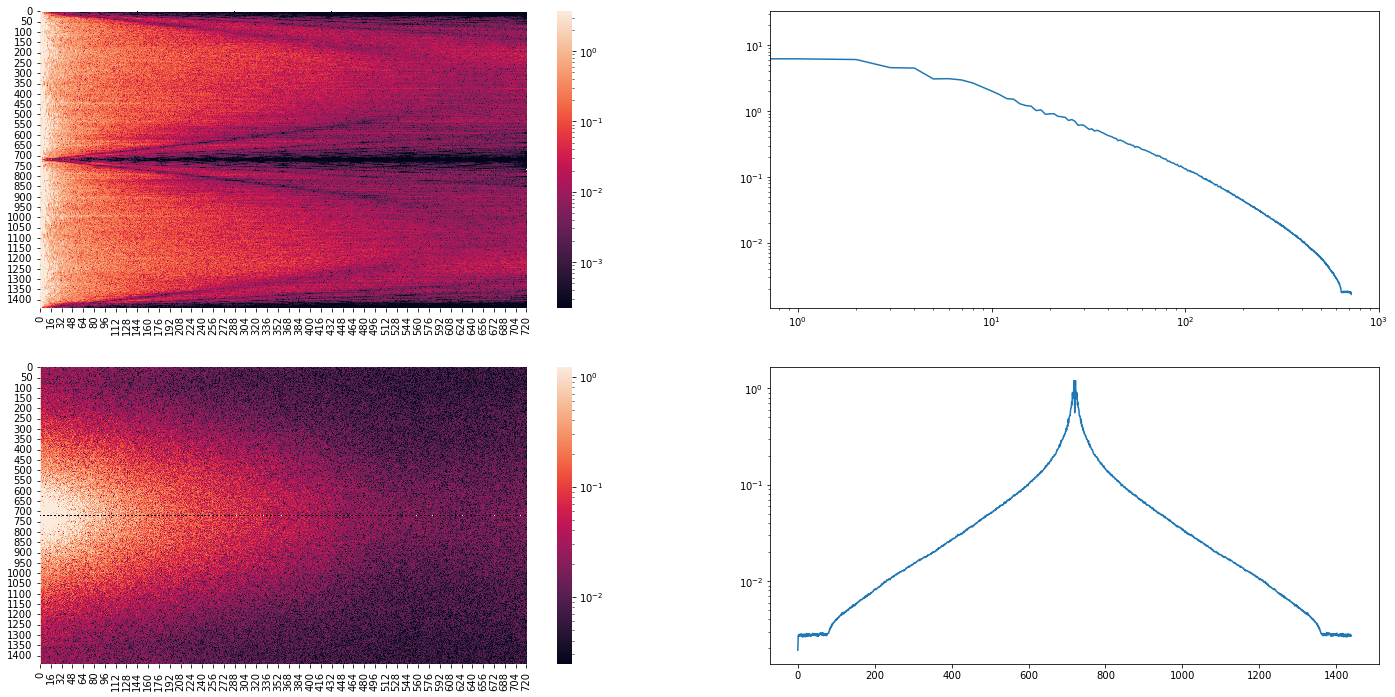

In [13]:
from matplotlib.colors import LogNorm, Normalize
import matplotlib.colors as colors
import torch.nn.functional as F
def sphere_to_torus(x):
    """ Performs a sphere to torus mapping for lat/long by reflecting and 
    shifting the input so that both the x and y directions are periodic. 

    Currently assumes (..., h, w, c) format. 
    """
    s = x.shape
    flipped_x = torch.flip(x, dims=(-2,))
    prefix = s[:-2]
    n_theta, n_lam, n_c = s[-2], s[-1], s[-3]
    output = torch.zeros(prefix + (n_theta*2, n_lam), device=x.device)
    output[...,  :n_theta, :] = x
    output[..., n_theta:, :n_lam//2] = flipped_x[..., :, n_lam//2:]
    output[..., n_theta:, n_lam//2:] = flipped_x[..., :, :n_lam//2]
    return output

def frequency_plot(x, k=0):
    x_freqs = torch.fft.rfft(x, dim=-1, norm='ortho')
    full_freqs = torch.fft.fftshift(torch.fft.fft(x_freqs, dim=-2, norm='ortho'), dim=-2)
    fig, axes = plt.subplots(2, 2, figsize=(24, 12))
    print(axes)
    plt_zonal = x_freqs[0][k].abs().detach().cpu().numpy()
    plt_total = full_freqs[0][k].abs().detach().cpu().numpy()
    plt_zonal_full = x_freqs[0, :, :, :].abs().detach().cpu().numpy()
    plt_total_full = full_freqs[0, :, :, :].abs().detach().cpu().numpy()

    sns.heatmap(plt_zonal, norm=colors.LogNorm(vmin=np.percentile(plt_zonal, 3), vmax=np.percentile(plt_zonal, 99)), ax=axes[0][0])
    sns.heatmap(plt_total, norm=colors.LogNorm(vmin=np.percentile(plt_total, 3), vmax=np.percentile(plt_total, 99)), ax=axes[1][0])
    axes[0][1].loglog(plt_zonal_full.mean((0, 1)))
    axes[1][1].semilogy(plt_total_full.mean((0, 2)))

def frequency_plot_bhwc(x, k=0):
    x_freqs = torch.fft.rfft(x, dim=2, norm='ortho')
    full_freqs = torch.fft.fftshift(torch.fft.fft(x_freqs, dim=1, norm='ortho'), dim=1)
    fig, axes = plt.subplots(2, 2, figsize=(24, 12))
    plt_zonal = x_freqs[0, :, :, k].abs().detach().cpu().numpy()
    plt_total = full_freqs[0, :, :, k].abs().detach().cpu().numpy()
    
    plt_zonal_full = x_freqs[0, :, :, :].abs().detach().cpu().numpy()
    plt_total_full = full_freqs[0, :, :, :].abs().detach().cpu().numpy()

    sns.heatmap(plt_zonal, norm=colors.LogNorm(vmin=np.percentile(plt_zonal, 3), vmax=np.percentile(plt_zonal, 99)), ax=axes[0][0])
    sns.heatmap(plt_total, norm=colors.LogNorm(vmin=np.percentile(plt_total, 3), vmax=np.percentile(plt_total, 99)), ax=axes[1][0])
    axes[0][1].loglog((plt_zonal_full).mean((0, 2)))
    axes[1][1].semilogy(plt_total_full.mean((1, 2)))
    

with torch.no_grad():
    d = torch.as_tensor(data_truth1[0][:1])
    # d = F.interpolate(d, scale_factor=.25, mode='bicubic')
    # Stage 1
    x = d.clone()
    x = sphere_to_torus(x)
    x[:, [1, 7, 10, 13], 1440//2:] = -x[:, [1, 7, 10, 13], 1440//2:]
    frequency_plot(x, 0)

#     xx = model(d, torch.as_tensor([0]))
#     # xx = model(d)

#     for i in range(0):
#         xx = model(xx, torch.as_tensor([i+1]))
#         # xx = model(xx)

#     frequency_plot(xx, 9)

# #     # Stage 3 - pos embed
#     fig = plt.figure(figsize=(16, 10))
#     plt.imshow(xx[0][0], cmap='turbo')


In [7]:
# Stage 2 - patches

x = model.patch_embed(x)
frequency_plot_bhwc(x.reshape(1, 180, 180, model.embed_dim))




RuntimeError: shape '[1, 180, 180, 768]' is invalid for input of size 44236800

In [8]:
# Stage 3 - pos embed

x = (x + model.pos_embed).reshape(1, 180, 180, model.embed_dim)
frequency_plot_bhwc(x, 10)



AttributeError: 'AFNONet' object has no attribute 'pos_embed'

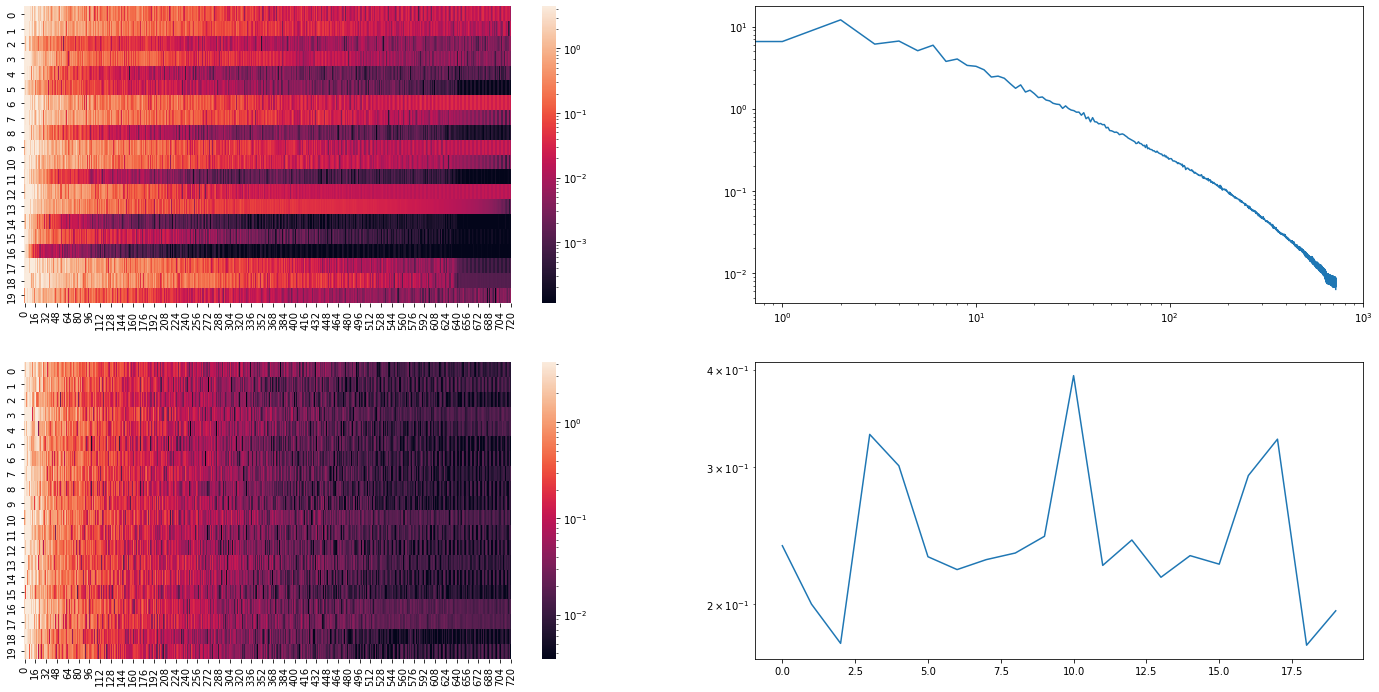

In [14]:
# Stage 4 - Blocks
y = x.clone()
# for block in model.blocks:
#     y = block(y)
    

frequency_plot_bhwc(y, 0)

In [15]:
import torch.nn.functional as F

def model_upsample(x):
    x = model.head(x)
    x = rearrange(
        x,
        "b h w (p1 p2 c_out) -> b c_out (h p1) (w p2)",
        p1=model.patch_size[0],
        p2=model.patch_size[1],
        h=model.img_size[0] // model.patch_size[0],
        w=model.img_size[1] // model.patch_size[1],
    )
    return x

def fourier_resample(x, factor=1/8):
    B, H, W, C = x.shape
    h, w = int(H*factor), int(W*factor)
    xfft = torch.fft.rfft2(x, dim=(1, 2))
    mid_fft = xfft.new_zeros(B, h, w//2+1, C)
    mid_fft[:, :min(H//2, h//2), :min(W//2+1, w//2+1)] =  xfft[:,  :min(H//2, h//2), :W//2+1]
    mid_fft[:, -min(H//2, h//2):, min(W//2+1, w//2+1)] = xfft[:,  -min(H//2, h//2):, :min(W//2+1, w//2+1)]
    return torch.fft.irfft2(mid_fft, dim=(1, 2))

def fourier_downsample(x, factor=8):
    B, H, W, C = x.shape
    h, w = H*factor, W*factor
    xfft = torch.fft.rfft2(x, dim=(1, 2))
    mid_fft = xfft.new_zeros(B, h, w//2+1, C)
    mid_fft[:, :H//2, :W//2+1] =  xfft[:,  :H//2, :W//2+1]
    mid_fft[:, -H//2:, :W//2+1] = xfft[:,  -H//2:, :W//2+1]
    return torch.fft.irfft2(mid_fft, dim=(1, 2))
     
    
with torch.no_grad():
    z = model_upsample(y)
    frequency_plot(z)
    
    z = fourier_upsample(y)
    frequency_plot_bhwc(z)
    
    z = F.interpolate(y, scale_factor=8, mode='bilinear')
    frequency_plot_bhwc(z)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (28800x1440 and 768x720)

### Are biases bad?

In [11]:
# y1 = model(d)

# frequency_plot(y1)

with torch.no_grad():
    for name, p in model.named_parameters():
        if 'b2' in name or 'b1' in name or 'bias' in name:
            p *= 0.# Needs to be inplace

    for name, p in model.named_parameters():
        if 'bias' in name or 'b1' in name or 'b2' in name:
            print(name, p.abs().mean())
        
# y2 = model(d)

# frequency_plot(y2)

patch_embed.head.bias tensor(0.)
patch_embed.projs.0.bias tensor(0.)
patch_embed.projs.1.bias tensor(0.)
patch_embed.projs.2.bias tensor(0.)
head.tail.bias tensor(0.)
head.projs.0.bias tensor(0.)
head.projs.1.bias tensor(0.)
head.projs.2.bias tensor(0.)
head.up_blocks.0.norm1.bias tensor(0.)
head.up_blocks.0.filter.b1 tensor(0.)
head.up_blocks.0.filter.b2 tensor(0.)
head.up_blocks.0.norm2.bias tensor(0.)
head.up_blocks.0.mlp.fc1.bias tensor(0.)
head.up_blocks.0.mlp.fc2.bias tensor(0.)
head.up_blocks.1.norm1.bias tensor(0.)
head.up_blocks.1.filter.b1 tensor(0.)
head.up_blocks.1.filter.b2 tensor(0.)
head.up_blocks.1.norm2.bias tensor(0.)
head.up_blocks.1.mlp.fc1.bias tensor(0.)
head.up_blocks.1.mlp.fc2.bias tensor(0.)
head.up_blocks.2.norm1.bias tensor(0.)
head.up_blocks.2.filter.b1 tensor(0.)
head.up_blocks.2.filter.b2 tensor(0.)
head.up_blocks.2.norm2.bias tensor(0.)
head.up_blocks.2.mlp.fc1.bias tensor(0.)
head.up_blocks.2.mlp.fc2.bias tensor(0.)
blocks.0.norm1.bias tensor(0.)
blocks.

In [9]:
torch.fft.irfft2(torch.ones(100, 100)*torch.randn(1, dtype=torch.cfloat))

tensor([[ 1.0754e+00, -4.8183e-01,  1.8062e-09,  ...,  1.6050e-01,
          3.9350e-09,  4.8183e-01],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        ...,
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00]])

## FILTER DEBUGGING

<AxesSubplot:>

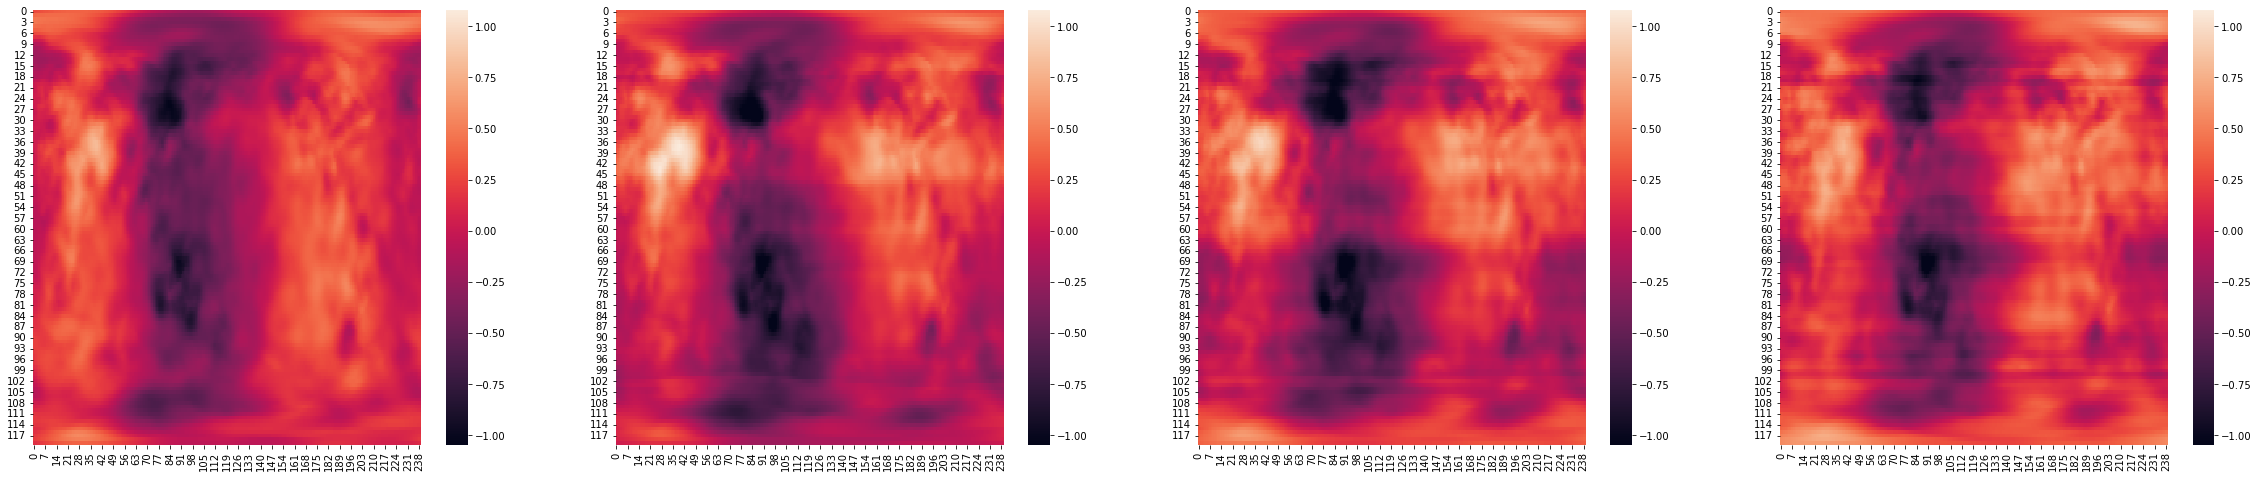

In [15]:
# fig, ax = plt.subplots(figsize=(16, 10))
dt = torch.tensor([0.])
pos_emb1 = model.cont_pos_embed(dt).squeeze()
# pos_emb = torch.view_as_complex(model.blocks[7].filter.conv_gen(torch.tensor([399.])).squeeze().reshape(180, 91, -1, 2)).imag
k = 6
dt = torch.tensor([240.])
pos_emb2 = model.cont_pos_embed(dt).squeeze()

dt = torch.tensor([480.])
pos_emb3 = model.cont_pos_embed(dt).squeeze()

dt = torch.tensor([720.])
pos_emb4 = model.cont_pos_embed(dt).squeeze()


vmax = max(pos_emb2[:, :,k].max(), pos_emb1[:, :,k].max())
vmin = max(pos_emb2[:, :,k].min(), pos_emb1[:, :,k].min())


fig, ax = plt.subplots(1, 4, figsize=(40, 8))


# fig, ax = plt.subplots(figsize=(16, 10))

# pos_emb = torch.view_as_complex(model.blocks[7].filter.conv_gen(torch.tensor([399.])).squeeze().reshape(180, 91, -1, 2)).imag
sns.heatmap(pos_emb1[:, :,k].detach(), ax=ax[0], vmax=vmax, vmin=vmin)
sns.heatmap(pos_emb2[:, :,k].detach(), ax=ax[1], vmax=vmax, vmin=vmin)
sns.heatmap(pos_emb3[:, :,k].detach(), ax=ax[2], vmax=vmax, vmin=vmin)
sns.heatmap(pos_emb4[:, :,k].detach(), ax=ax[3], vmax=vmax, vmin=vmin)

In [9]:
model.cont_pos_embed.datetime_features(torch.as_tensor([0.])).shape

torch.Size([28800, 42])

<AxesSubplot:>

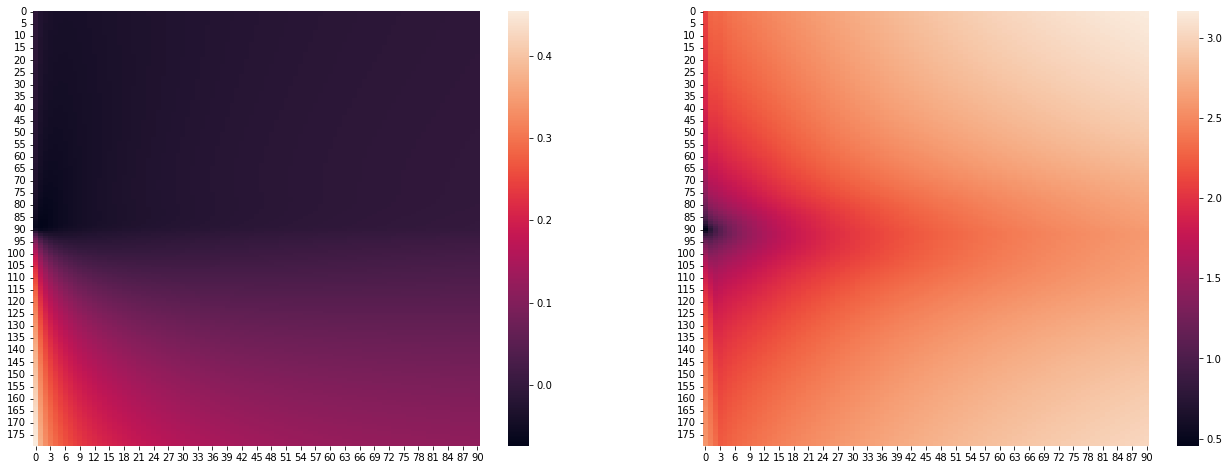

In [20]:
# fig, ax = plt.subplots(figsize=(16, 10))
dt = torch.tensor([0.])
# pos_emb1 = model.cont_pos_embed(dt).squeeze()
pos_emb1 = model.blocks[-1].filter.conv_gen1(dt).squeeze().reshape(180, 91, -1)
k = k+1

dt = torch.tensor([2.])
pos_emb2 = model.blocks[-1].filter.conv_gen2(dt).squeeze().reshape(180, 91, -1)


vmax = max(pos_emb2[:, :,k].max(), pos_emb1[:, :,k].max())
vmin = min(pos_emb2[:, :,k].min(), pos_emb1[:, :,k].min())


fig, ax = plt.subplots(1, 2, figsize=(22, 8))


# fig, ax = plt.subplots(figsize=(16, 10))

# pos_emb = torch.view_as_complex(model.blocks[7].filter.conv_gen(torch.tensor([399.])).squeeze().reshape(180, 91, -1, 2)).imag
sns.heatmap(torch.fft.fftshift(pos_emb1[:, :,k], -2).detach(), ax=ax[0])
sns.heatmap(torch.fft.fftshift(pos_emb2[:, :,k], -2).detach(), ax=ax[1])

In [68]:
model.blocks[-1].filter.conv_gen1.space_features.reshape(90

SyntaxError: unexpected EOF while parsing (2379736003.py, line 1)

<AxesSubplot:>

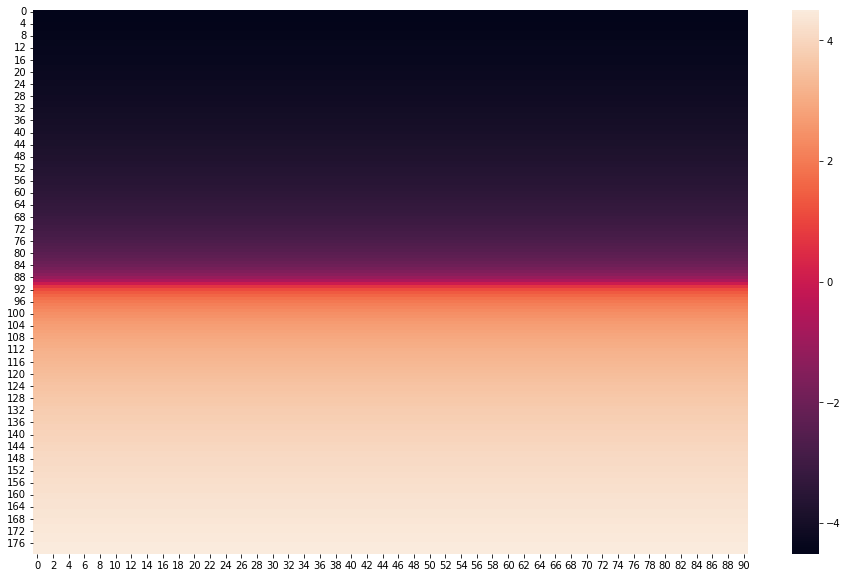

In [57]:
sf = torch.fft.fftshift(model.blocks[-1].filter.conv_gen1.space_features.reshape(180, 91, -1), 0)

fig, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(sf[:, :, 0].detach(), ax=ax)

In [55]:
grid_shape = 180, 180
grid_coords = torch.cartesian_prod(torch.fft.fftfreq( grid_shape[0])*grid_shape[0], torch.fft.rfftfreq(grid_shape[1])*grid_shape[1])
grid_sgns = torch.sign(grid_coords)
grid_coords = torch.log1p(grid_coords.abs()+1e-5)*grid_sgns


In [54]:
sns.heatmap(sf[:, :, 1].detach(), ax=ax)

tensor([[ 0.0000,  0.0000],
        [ 0.0000,  0.6932],
        [ 0.0000,  1.0986],
        ...,
        [-0.6932,  4.4886],
        [-0.6932,  4.4998],
        [-0.6932,  4.5109]])

In [22]:
from e3nn.o3 import spherical_harmonics_alpha_beta
from scipy.special import sph_harm, eval_legendre
grid_shape = 90, 180
sph_order = 20

grid_coords = torch.cartesian_prod(torch.linspace(0, np.pi, grid_shape[0]), torch.linspace(0, 2*np.pi, grid_shape[1]+1)[:-1])
space_features = spherical_harmonics_alpha_beta(list(range(1, sph_order+1)), grid_coords[:, 1], grid_coords[:, 0]).reshape(90, 180, -1)


# stack_feats = []
# for degree in range(1, 11):
#     for order in range(-degree, degree+1):
#          y = sph_harm(order, degree, grid_coords[:, 1], grid_coords[:, 0]).float()
#          stack_feats.append(y)
# space_features = torch.stack(stack_feats, -1).reshape(90, 180, -1)

# Otherwise use 1D legendre polynomials - kind of assuming this is frequency space
# else:

grid_coords = torch.cartesian_prod(torch.fft.fftfreq(grid_shape[0]), torch.fft.rfftfreq(grid_shape[1]))
grid_shape = torch.fft.fftfreq(grid_shape[0]).shape[0], torch.fft.rfftfreq(grid_shape[1]).shape[0]
stack_feats = []
for i in range(0, 21):
    for j in range(0, 21):
        x = eval_legendre(i, grid_coords[:, 1]).float()
        y = eval_legendre(j, grid_coords[:, 0]).float()
        stack_feats.append(x*y)
    # stack_feats.append(y)
space_features = torch.stack(stack_feats, -1).reshape(90, 91, -1)


In [21]:
space_features.shape

torch.Size([8190, 441])

In [26]:
k = 0

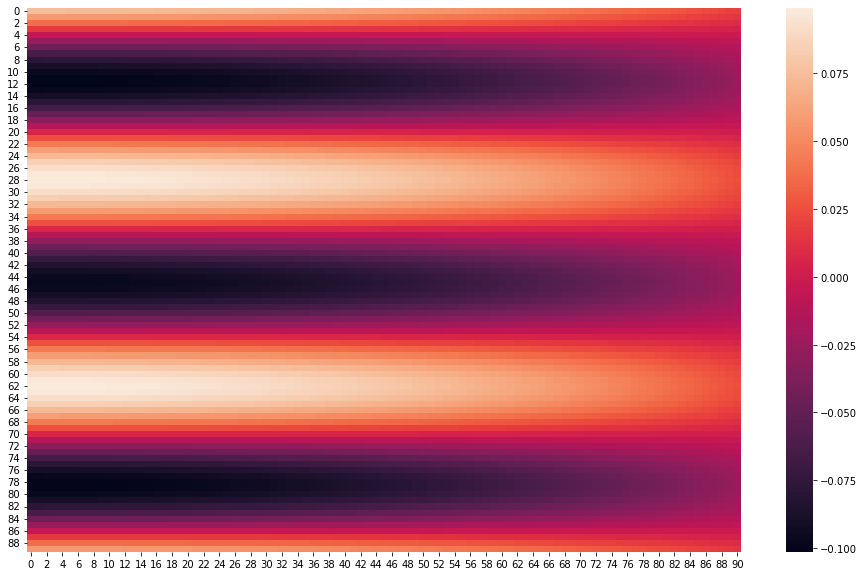

In [85]:

fig, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(torch.fft.fftshift(space_features[:, :, k], dim=0).detach(), ax=ax)
k += 1

In [31]:
space_features.shape

torch.Size([90, 91, 40])

In [197]:
grid_shape = (90, 180)

grid_coords = torch.cartesian_prod(torch.fft.fftfreq( grid_shape[0])*grid_shape[0], torch.fft.rfftfreq(grid_shape[1])*grid_shape[1])
grid_sgns = torch.sign(grid_coords)
grid_coords = torch.log1p(grid_coords.abs()+1e-5)*grid_sgns


In [200]:
grid_coords.isnan().sum()

tensor(0)

In [13]:
model

AFNONet(
  (patch_embed): PatchEmbed(
    (head): ComplexLinear(in_features=20, out_features=96, bias=True)
    (projs): ModuleList(
      (0): ComplexLinear(in_features=96, out_features=192, bias=True)
      (1): ComplexLinear(in_features=96, out_features=384, bias=True)
      (2): ComplexLinear(in_features=96, out_features=768, bias=True)
    )
  )
  (head): DePatchEmbed(
    (tail): ComplexLinear(in_features=96, out_features=20, bias=True)
    (projs): ModuleList(
      (0): ComplexLinear(in_features=768, out_features=384, bias=True)
      (1): ComplexLinear(in_features=384, out_features=192, bias=True)
      (2): ComplexLinear(in_features=192, out_features=96, bias=True)
    )
    (up_blocks): ModuleList(
      (0): Block(
        (norm1): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
        (filter): AFNO2D()
        (drop_path): Identity()
        (norm2): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
        (mlp): Mlp(
          (fc1): Linear(in_features=384, o

In [51]:
def daylength(dayOfYear, lat):
    """
    Swapped to torch from: https://gist.github.com/anttilipp/ed3ab35258c7636d87de6499475301ce
    
    Computes the length of the day (the time between sunrise and
    sunset) given the day of the year and latitude of the location.
    Function uses the Brock model for the computations.
    For more information see, for example,
    Forsythe et al., "A model comparison for daylength as a
    function of latitude and day of year", Ecological Modelling,
    1995.
    Parameters
    ----------
    dayOfYear : int
        The day of the year. 1 corresponds to 1st of January
        and 365 to 31st December (on a non-leap year).
    lat : float
        Latitude of the location in degrees. Positive values
        for north and negative for south.
    Returns
    -------
    d : float
        Daylength in hours.
    """
    lat = -(lat - np.pi/2) # input is [0, pi], but formula is [pi/2, -pi/2] which seems a bit colonial
    declinationOfEarth = 0.40927971*torch.sin((2*np.pi*(283.0+dayOfYear)/365.0))
    tan_func = -torch.tan(lat) * torch.tan(declinationOfEarth)
    if tan_func <= -1.0:
        return 24.0
    elif tan_func >= 1.0:
        return 0.0
    else:
        hourAngle = torch.rad2deg(torch.arccos(-torch.tan(lat) * torch.tan(declinationOfEarth)))
        return 2.0*hourAngle/15.0

In [67]:
daylength(torch.tensor([90]), torch.tensor([np.pi]))

24.0

In [80]:
import numpy as np

def daylength(dayOfYear, lat):
    """Computes the length of the day (the time between sunrise and
    sunset) given the day of the year and latitude of the location.
    Function uses the Brock model for the computations.
    For more information see, for example,
    Forsythe et al., "A model comparison for daylength as a
    function of latitude and day of year", Ecological Modelling,
    1995.
    Parameters
    ----------
    dayOfYear : int
        The day of the year. 1 corresponds to 1st of January
        and 365 to 31st December (on a non-leap year).
    lat : float
        Latitude of the location in degrees. Positive values
        for north and negative for south.
    Returns
    -------
    d : float
        Daylength in hours.
    """
    latInRad = np.deg2rad(lat)
    declinationOfEarth = 23.45*np.sin(np.deg2rad(360.0*(283.0+dayOfYear)/365.0))
    if -np.tan(latInRad) * np.tan(np.deg2rad(declinationOfEarth)) <= -1.0:
        return 24.0
    elif -np.tan(latInRad) * np.tan(np.deg2rad(declinationOfEarth)) >= 1.0:
        return 0.0
    else:
        hourAngle = np.rad2deg(np.arccos(-np.tan(latInRad) * np.tan(np.deg2rad(declinationOfEarth))))
        return 2.0*hourAngle/15.0
    
def day_length(day_of_year, latitude):
    P = torch.asin(0.39795 * torch.cos(0.2163108 + 2 * torch.atan(0.9671396 * torch.tan(.00860 * (day_of_year - 186)))))
    pi = np.pi
    day_light_hours = 24 - (24 / pi) * torch.acos((np.sin(0.8333 * pi / 180) + torch.sin(latitude) * torch.sin(P)) / (torch.cos(latitude) * torch.cos(P)))

    return day_light_hours

In [89]:
day_length(torch.tensor([345]), torch.tensor([np.pi/2]))

tensor([nan])

In [193]:
day_length(torch.tensor([180.]), torch.tensor([[0.], [1.]]).T)

torch.Size([1, 2])
torch.Size([1, 2])
torch.Size([1, 2])


tensor([[24.0000, 10.0107]])

In [192]:
import math
def day_length(day_of_year, latitude):
    """ Adapted from here: https://www.dataliftoff.com/plotting-hours-of-daylight-in-python-with-matplotlib/"""
    rval = torch.zeros_like(latitude)
    pi = np.pi
    latitude = torch.rad2deg((latitude-pi/2))
    P = torch.asin(0.39795 * torch.cos(0.2163108 + 2 * torch.atan(0.9671396 * torch.tan(.00860 * (day_of_year - 186)))))
    
    inside_arccos = (np.sin(0.8333 * pi / 180) + torch.sin(latitude * pi / 180) * torch.sin(P)) / (torch.cos(latitude * pi / 180) * torch.cos(P))
    mask = inside_arccos.abs() < 1
    rval[mask] = 24 - (24 / pi) * torch.arccos(inside_arccos[mask])
    rval[inside_arccos >= 1] = 24.
    rval[inside_arccos <=-1] = 0
    return (rval - 12) / 12

In [167]:
np.arccos(0)

1.5707963267948966